Cleaned data shape: (22819, 34)
Enhanced data shape: (22819, 38)
                  bedrooms  price_sqm   terrace    garden      pool  \
bedrooms          1.000000  -0.196513  0.002225  0.208372  0.127069   
price_sqm        -0.196513   1.000000 -0.001345 -0.120878 -0.019440   
terrace           0.002225  -0.001345  1.000000  0.114831  0.041815   
garden            0.208372  -0.120878  0.114831  1.000000  0.081825   
pool              0.127069  -0.019440  0.041815  0.081825  1.000000   
livingarea        0.566866  -0.206689 -0.016316  0.140819  0.185103   
surfaceoftheplot  0.189393  -0.049232 -0.019635  0.050359  0.136702   
gardensurface     0.096995  -0.019573  0.039633  0.201924  0.067857   
facades           0.267318  -0.144620  0.075152  0.194622  0.190743   

                  livingarea  surfaceoftheplot  gardensurface   facades  
bedrooms            0.566866          0.189393       0.096995  0.267318  
price_sqm          -0.206689         -0.049232      -0.019573 -0.144620  
te


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a D

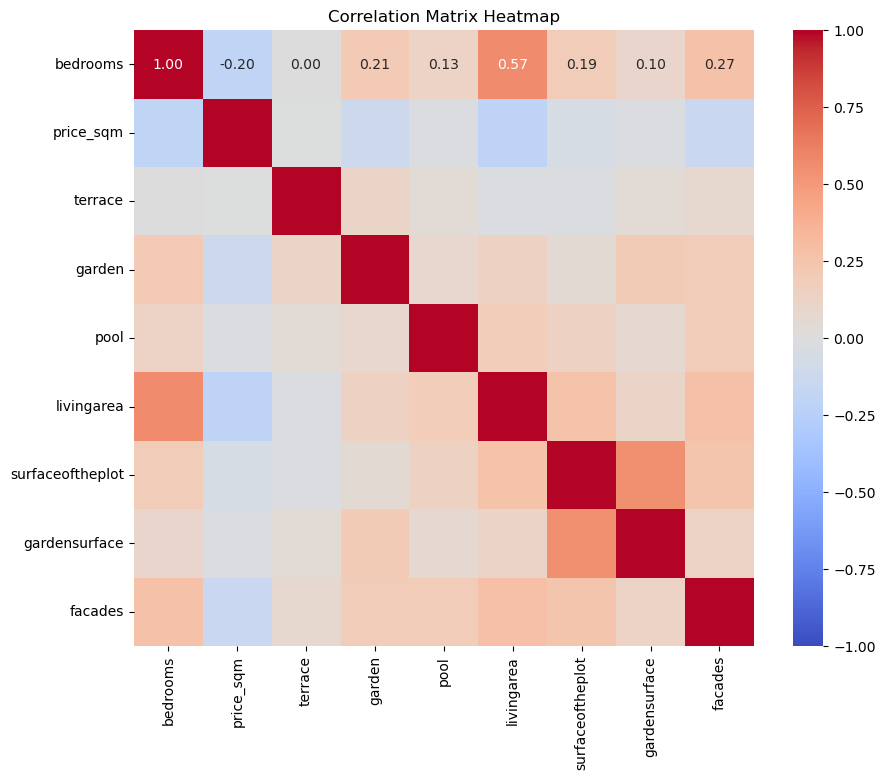

Training data shape: X_train: (15973, 9), y_train: (15973,)
Test data shape: X_test: (6846, 9), y_test: (6846,)
Model saved to ../model/saved_model.pkl

Training Metrics:
MAE: 154883.2816
RMSE: 226001.2404
R²: 0.4039
MAPE: 33.7254
sMAPE: 29.5540

Test Metrics:
MAE: 152790.5520
RMSE: 219867.2013
R²: 0.4236
MAPE: 33.8451
sMAPE: 29.5202


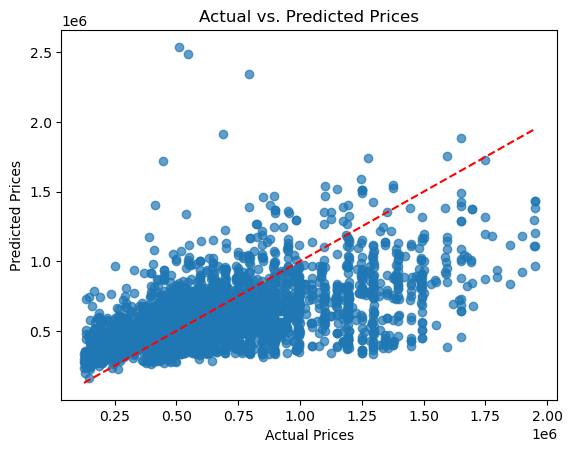

SHAP Values Shape: (6846, 9)
SHAP Values Example: [[ 3.40064403e+04 -4.56269961e+04 -1.72529117e+04  3.43833584e+03
   1.61423418e+05 -1.26743745e+04  5.13126217e+02 -7.90837280e+00
   1.75653780e+04]
 [ 8.32911364e+04 -2.02973648e+04 -1.72529117e+04  3.43833584e+03
  -1.03036224e+04  1.27340329e+05  1.99262815e+04 -7.90837280e+00
  -9.66776616e+03]
 [ 3.40064403e+04 -1.00674675e+05 -1.72529117e+04  3.43833584e+03
  -1.03036224e+04 -1.57181724e+04  1.00790080e+03 -7.90837280e+00
  -9.66776616e+03]
 [ 8.32911364e+04 -6.65258883e+04  5.15346713e+03  3.43833584e+03
  -1.03036224e+04  2.54461505e+03 -1.85279586e+03 -7.90837280e+00
  -9.66776616e+03]
 [-1.52782558e+04 -2.02973648e+04  5.15346713e+03  3.43833584e+03
  -1.03036224e+04 -2.05882490e+04  1.31523677e+04 -7.90837280e+00
   3.94880590e+03]]
Feature Names: ['bedrooms', 'price_sqm', 'terrace', 'garden', 'pool', 'livingarea', 'surfaceoftheplot', 'gardensurface', 'facades']


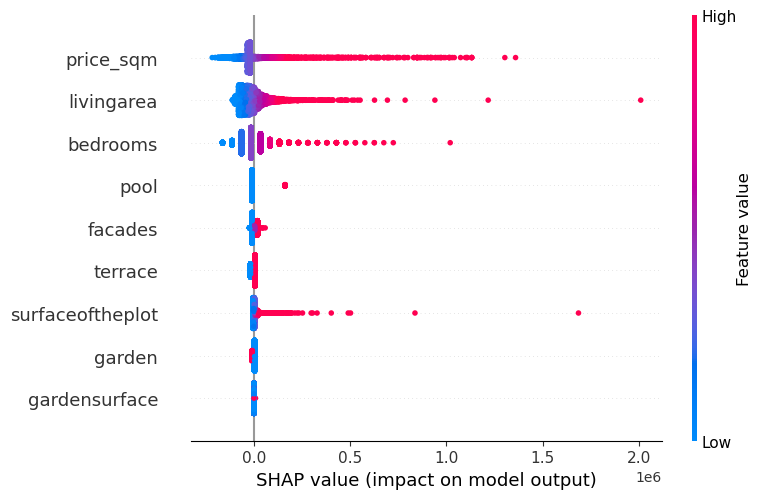

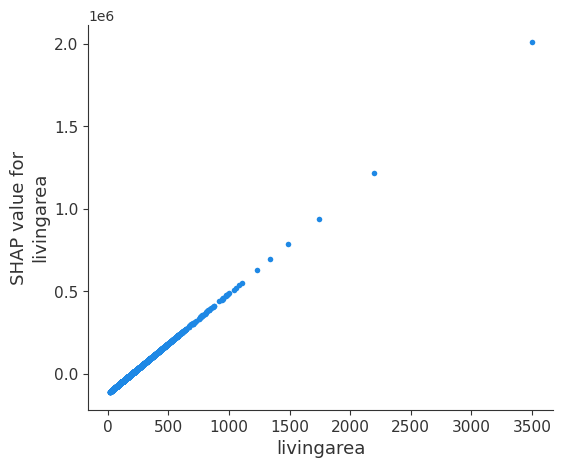

In [14]:
import pandas as pd #Data management
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  #linear regression model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score   #model Evaluation
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt #vizualization
import seaborn as sns  #visualization
import pickle
import os
# Import necessary modules from other files
from Data_cleaning import Clean_Data
from feature_engineering import FeatureEngineering
import shap  
import pandas as pd
from sklearn.model_selection import train_test_split

class LinearRegressionModel:
    def __init__(self, data: pd.DataFrame):
        """
        Initializes the LinearRegressionModel class with a dataset.
        Cleans the data and performs feature engineering upon initialization.
        """
        self.data = data
        self.model = LinearRegression()
       
    def create_pipeline(self):
        """Creates the pipeline for preprocessing and modeling."""
        # Identify categorical and numerical features
        numeric_features = [
                "bedrooms",
                "livingarea",
                "surfaceoftheplot",
                "gardensurface",
                "facades",
                "pool"
             ]
        # Preprocessing steps for numeric features 
        numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),  # Handle missing values
        ('scaler', StandardScaler())  # Standardize numerical features
         ])

        # Preprocessing steps for categorical features (if any)
        categorical_features = self.data.select_dtypes(include=['object']).columns.tolist()
        categorical_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent'))  # Handle missing values
        ])

        # Create a column transformer to apply preprocessing to each column
        self.preprocessor = ColumnTransformer(
            transformers=[
                ('num', numeric_transformer, numeric_features),
                ('cat', categorical_transformer, categorical_features)
            ])

        # Create the full pipeline: preprocessing + model
        self.pipeline = Pipeline(steps=[
            ('preprocessor', self.preprocessor),
            ('model', self.model)
        ])

    def split_data(self):
        """Splits the data into training and test sets."""
        numeric_features = [
            "bedrooms",
            'price_sqm',
            'terrace',
            'garden',
            'pool',
            "livingarea",
            "surfaceoftheplot",
            "gardensurface",
            "facades",
        ]
        X = self.data[numeric_features]
        y = self.data["price"]
      # Check correlation matrix to detect multicollinearity
        corr_matrix = self.data[numeric_features].corr()
        print(corr_matrix)

        #Plot the heatmap
        plt.figure(figsize=(10, 8))  # Set the figure size
        sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True, vmin=-1, vmax=1)

        # Add labels and title
        plt.title("Correlation Matrix Heatmap")
        plt.show()
        return train_test_split(X, y, test_size=0.3, random_state=41)
       
    def train_model(self, X_train, y_train):
        """Trains the Linear Regression model."""
        #reflects how well the model is performing on the training data versus how well it generalizes to unseen (test) data.
        self.model.fit(X_train, y_train)

    # Save the model to a .pkl file
    def save_model(self, file_path="../model/saved_model.pkl"):
        """Saves the trained model to a specified file path."""
        os.makedirs(os.path.dirname(file_path), exist_ok=True)  # Ensure the directory exists
        with open(file_path, 'wb') as f:
            pickle.dump(self.model, f)
        print(f"Model saved to {file_path}")

    def evaluate_metrics(self, y_true, y_pred):
        """Calculates evaluation metrics."""
        mae = mean_absolute_error(y_true, y_pred)
        rmse = mean_squared_error(y_true, y_pred, squared=False)
        r2 = r2_score(y_true, y_pred)
        mape = 100 * (abs((y_true - y_pred) / y_true)).mean()
        smape = (
            100
            * (
                abs(y_true - y_pred)
                / ((abs(y_true) + abs(y_pred)) / 2)
            ).mean()
        )
        return {"MAE": mae, "RMSE": rmse, "R²": r2, "MAPE": mape, "sMAPE": smape}
    

    def evaluate_model(self, X_train, y_train, X_test, y_test):
        """Evaluates the model on training and test data."""
        y_train_pred = self.model.predict(X_train)
        y_test_pred = self.model.predict(X_test)

        train_metrics = self.evaluate_metrics(y_train, y_train_pred)
        test_metrics = self.evaluate_metrics(y_test, y_test_pred)

        print("\nTraining Metrics:")
        for metric, value in train_metrics.items():
            print(f"{metric}: {value:.4f}")

        print("\nTest Metrics:")
        for metric, value in test_metrics.items():
            print(f"{metric}: {value:.4f}")

        return y_test, y_test_pred

    def visualize_results(self, y_test, y_pred):
        """Visualizes actual vs. predicted prices."""
        plt.scatter(y_test, y_pred, alpha=0.7)
        plt.plot(
            [min(y_test), max(y_test)],
            [min(y_test), max(y_test)],
            color="red",
            linestyle="--",
        )
        plt.xlabel("Actual Prices")
        plt.ylabel("Predicted Prices")
        plt.title("Actual vs. Predicted Prices")
        plt.show()

    def explain_model(self, X_train, X_test):
        """Generates SHAP explanations for the model."""
        # Ensure data is numeric and contains no missing values
        X_train = X_train.select_dtypes(include=["float64", "int64"]).fillna(0)
        X_test = X_test.select_dtypes(include=["float64", "int64"]).fillna(0)

        # Step 1: Create the SHAP explainer for the trained model
        explainer = shap.LinearExplainer(self.model, X_train)

        # Step 2: Get SHAP values for the test set
        shap_values = explainer(X_test)

        # Debug SHAP values
        print("SHAP Values Shape:", shap_values.values.shape)
        print("SHAP Values Example:", shap_values.values[:5])
        print("Feature Names:", X_test.columns.tolist())

        # Step 3: Create a summary plot to understand feature importance
        shap.summary_plot(shap_values.values, X_test)

        # Step 4: Create a dependence plot to explore feature interactions
        # Example: Interaction between 'livingarea' and 'gardensurface'
        if "livingarea" in X_test.columns:
            shap.dependence_plot("livingarea", shap_values.values, X_test, interaction_index=None)


        
# Step 1: Load the dataset
data = pd.read_csv("../data/all_province_municipality.csv", low_memory=False)

# Clean the data
cleaner = Clean_Data(data)
cleaned_data = cleaner.cleaner()

print(f"Cleaned data shape: {cleaned_data.shape}")
# Perform feature engineering
feature_engineer = FeatureEngineering(cleaned_data)
enhanced_data = feature_engineer.feature_engineering()
print(f"Enhanced data shape: {enhanced_data.shape}")
# Train the model
model = LinearRegressionModel(enhanced_data)
X_train, X_test, y_train, y_test = model.split_data()

print(f"Training data shape: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Test data shape: X_test: {X_test.shape}, y_test: {y_test.shape}")

model.train_model(X_train, y_train)

model.save_model("../model/saved_model.pkl")
y_test_actual, y_pred_actual = model.evaluate_model(X_train, y_train, X_test, y_test)
model.visualize_results(y_test_actual, y_pred_actual)

# Generate SHAP explanations
model.explain_model(X_train, X_test)


